In [75]:
print("""
@Description: Predicting house prices: A regression example
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-07-30 19:18:28
""")


@Description: Predicting house prices: A regression example
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-07-30 19:18:28



In [135]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [136]:
train_data.shape

(404, 13)

In [137]:
test_data.shape

(102, 13)

In [144]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= mean
test_data -= mean
test_data /= std

In [145]:
from tensorflow import keras
from tensorflow.keras import layers
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1),
    ])
    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae'])
    return model

In [146]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f'Processing fold #{i}')
    val_data = train_data[i * num_val_samples:  (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([
        train_data[: i * num_val_samples],
        train_data[(i + 1) * num_val_samples:],
    ], axis=0)
    partial_train_targets = np.concatenate([
        train_targets[: i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]
    ], axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0) # verbose=0 静默输出
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [149]:
all_scores

[1.855372399529165e+16,
 7704642511175680.0,
 7488550358482944.0,
 7820008553971712.0]

In [110]:
np.mean(all_scores)

2.608416259288788

In [123]:
# BUG
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f'Processing fold #{i}')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([
        train_data[: i * num_val_samples],
        train_data[(i + 1) * num_val_samples:],
    ], axis=0)
    partial_train_targets = np.concatenate([
        train_targets[: i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]
    ], axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        epochs=num_epochs, batch_size=16, verbose=0,
                        validation_data=(val_data, val_targets)) # verbose=0 静默输出
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [124]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

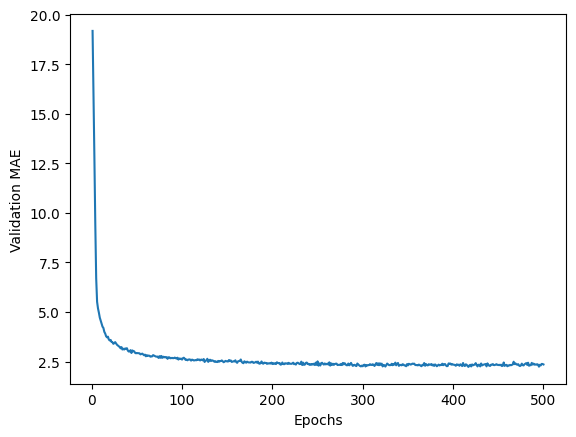

In [125]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

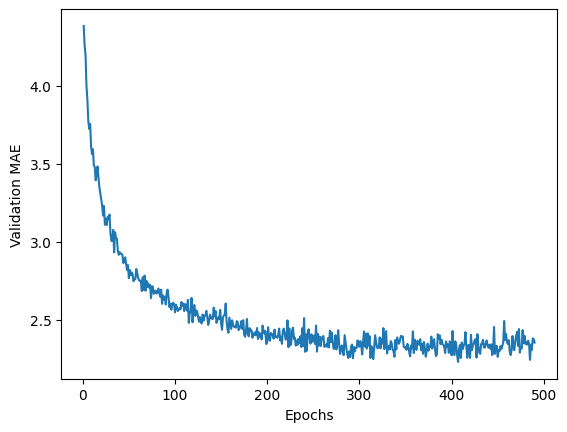

In [126]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [120]:
model =  build_model()
model.fit(train_data, train_targets,
          epochs=500, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 3287.2161 - mae: 34.0409


In [121]:
test_mae_score

34.04094314575195

In [122]:
model = build_model()
model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs, batch_size=16, verbose=0) # verbose=0 静默输出
val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)

KeyboardInterrupt: 